In [1]:
import torch
from torchvision import transforms,datasets
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader
import numpy as np
import cv2
from torch import nn,optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt

In [2]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224

In [3]:
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])



In [4]:
model = EfficientNet.from_pretrained(model_name,in_channels=3, num_classes=100)



Loaded pretrained weights for efficientnet-b0


In [80]:
model



EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [13]:
# class_to_idx={'1': 0, '10': 1, '100': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '52': 48, '53': 49, '54': 50, '55': 51, '56': 52, '57': 53, '58': 54, '59': 55, '6': 56, '60': 57, '61': 58, '62': 59, '63': 60, '64': 61, '65': 62, '66': 63, '67': 64, '68': 65, '69': 66, '7': 67, '70': 68, '71': 69, '72': 70, '73': 71, '74': 72, '75': 73, '76': 74, '77': 75, '78': 76, '79': 77, '8': 78, '80': 79, '81': 80, '82': 81, '83': 82, '84': 83, '85': 84, '86': 85, '87': 86, '88': 87, '89': 88, '9': 89, '90': 90, '91': 91, '92': 92, '93': 93, '94': 94, '95': 95, '96': 96, '97': 97, '98': 98, '99': 99}
# new_class_to_idx={}
# for key, value in class_to_idx.items():
#     if str(key) != str(value):
#         # print(key,value)
#         value=key
#         new_class_to_idx.update({key:value})
#     if str(key) == str(value):
#         new_class_to_idx.update({key:value})
# new_class_to_idx

{'1': '1',
 '10': '10',
 '100': '100',
 '11': '11',
 '12': '12',
 '13': '13',
 '14': '14',
 '15': '15',
 '16': '16',
 '17': '17',
 '18': '18',
 '19': '19',
 '2': '2',
 '20': '20',
 '21': '21',
 '22': '22',
 '23': '23',
 '24': '24',
 '25': '25',
 '26': '26',
 '27': '27',
 '28': '28',
 '29': '29',
 '3': '3',
 '30': '30',
 '31': '31',
 '32': '32',
 '33': '33',
 '34': '34',
 '35': '35',
 '36': '36',
 '37': '37',
 '38': '38',
 '39': '39',
 '4': '4',
 '40': '40',
 '41': '41',
 '42': '42',
 '43': '43',
 '44': '44',
 '45': '45',
 '46': '46',
 '47': '47',
 '48': '48',
 '49': '49',
 '5': '5',
 '50': '50',
 '51': '51',
 '52': '52',
 '53': '53',
 '54': '54',
 '55': '55',
 '56': '56',
 '57': '57',
 '58': '58',
 '59': '59',
 '6': '6',
 '60': '60',
 '61': '61',
 '62': '62',
 '63': '63',
 '64': '64',
 '65': '65',
 '66': '66',
 '67': '67',
 '68': '68',
 '69': '69',
 '7': '7',
 '70': '70',
 '71': '71',
 '72': '72',
 '73': '73',
 '74': '74',
 '75': '75',
 '76': '76',
 '77': '77',
 '78': '78',
 '79': '79'

In [14]:
train_imgs=datasets.ImageFolder(r'E:\A_py_project\EfficientNet-PyTorch\examples\simple\data\MMU2\train',transform=tfms)
test_imgs=datasets.ImageFolder(r'E:\A_py_project\EfficientNet-PyTorch\examples\simple\data\MMU2\test',transform=tfms)

In [82]:
train_loader=DataLoader(dataset=train_imgs,shuffle=True,batch_size=64,pin_memory=True)
test_loader=DataLoader(dataset=test_imgs,shuffle=False,batch_size=64,pin_memory=True)


In [83]:
for param in model.parameters():
    param.requires_grad=False
for param in model._fc.parameters():
    param.requires_grad=True


In [84]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [85]:
model.to(device)


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [86]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func=nn.CrossEntropyLoss().to(device)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer=optimizer, step_size=10, gamma=0.5)


In [87]:
loss_train=[]
loss_valid=[]
acc=[]
def train(epoch):
    loss=0
    for step,(x,y) in enumerate(train_loader):
        # gpu计算
        x=x.to(device)
        y=y.to(device)
        output=model(x)
        loss=loss_func(output,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step%100==0:
            print('Train Epoch:{}[{}/{}({:.0f})]\tLoss:{:.6f}'.format(
                epoch,step*len(x),len(train_loader.dataset),
                100.*step/len(train_loader),loss.item()))
    loss_train.append(loss.item())

def test():
    model.eval()
    test_loss=0
    correct=0
    for step,(x,y) in enumerate(test_loader):
        # gpu计算
        x = x.to(device)
        y = y.to(device)
        output=model(x)
        test_loss+=loss_func(output,y).item()
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(y.data.view_as(pred)).cpu().sum()
        test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    loss_valid.append(test_loss*len(test_loader.dataset))
    acc.append(100. * correct / len(test_loader.dataset))

In [88]:
for epoch in range(20):
    train(epoch)
    test()
torch.save({'mmu2_efficient': model.state_dict()}, 'mmu2_efficient.pth')

Train Epoch:0[0/696(0)]	Loss:4.586822

Test set: Average loss: 0.0156, Accuracy: 4/299 (1%)

Train Epoch:1[0/696(0)]	Loss:4.452347

Test set: Average loss: 0.0128, Accuracy: 132/299 (44%)

Train Epoch:2[0/696(0)]	Loss:3.793731

Test set: Average loss: 0.0099, Accuracy: 236/299 (79%)

Train Epoch:3[0/696(0)]	Loss:3.095123

Test set: Average loss: 0.0075, Accuracy: 261/299 (87%)

Train Epoch:4[0/696(0)]	Loss:2.296886

Test set: Average loss: 0.0057, Accuracy: 280/299 (94%)

Train Epoch:5[0/696(0)]	Loss:1.774607

Test set: Average loss: 0.0044, Accuracy: 288/299 (96%)

Train Epoch:6[0/696(0)]	Loss:1.346722

Test set: Average loss: 0.0033, Accuracy: 291/299 (97%)

Train Epoch:7[0/696(0)]	Loss:1.060035

Test set: Average loss: 0.0029, Accuracy: 292/299 (98%)

Train Epoch:8[0/696(0)]	Loss:0.779209

Test set: Average loss: 0.0024, Accuracy: 294/299 (98%)

Train Epoch:9[0/696(0)]	Loss:0.651114

Test set: Average loss: 0.0019, Accuracy: 294/299 (98%)

Train Epoch:10[0/696(0)]	Loss:0.533282

Tes

In [89]:
loss_train=np.array(loss_train)
loss_valid=np.array(loss_valid)
x_loss=np.vstack((loss_train,loss_valid))

In [15]:
loss_train.shape

(200,)

In [51]:
loss_valid.shape

(20,)

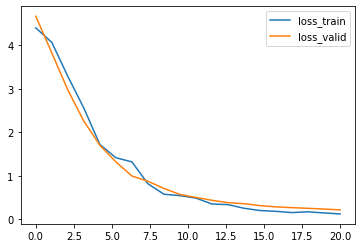

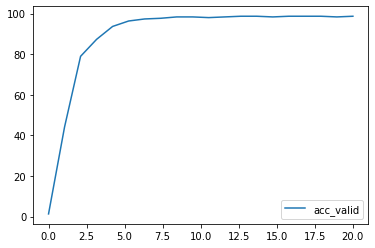

In [90]:
x=np.linspace(0,20,20)
plt.plot(x,x_loss[0],label="loss_train")
plt.plot(x,x_loss[1],label="loss_valid")
plt.legend()
plt.show()

plt.plot(x,acc,label="acc_valid")
plt.legend()
plt.show()